# Lab 5

With k-means, we have started to explore _unsupervised learning_ by clustering the data into $k$ clusters. Today we will explore using **dimension reduction** to summarize our data. Today goals are:

0. Define "data dimension" and why we might need to reduce the dimension of our data
1. View data in three dimensions
2. Explore _Principal Component Analysis_ 

In [24]:
# Import block 
# (What else is missing?)

%matplotlib notebook 
# Note the difference here!

import pandas as pd
import numpy as np

from mpl_toolkits import mplot3d # <-- New line
import matplotlib.pyplot as plt

#### Data for this Lab

For this lab, we will again using the (fake) student dataset. From this data, construct `justnum`, a numpy array of only the numerical variables from `students`. 

In [22]:
# Importing the students information 
students = pd.read_csv("../Lab03/students_info.csv")

In [23]:
# Selecting only the numerical variables AND convert to a numpy array
justnum = students[["coffee", "sleep", "gym", "gpa"]].to_numpy()

## Dimension of Data

The goal of **dimension reduction** is simply to reduce the dimension of your data. So what is the dimension of data?

Recall the shape of our data:

<table>
<thead>
<tr>
<th></th>
<th>Variable 0</th>
<th>Variable 1</th>
<th>Variable 2</th>
<th>Variable 3</th>
<th>Variable 4</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>Observation 0</strong></td>
<td>Var 0 of Obs 0</td>
<td>Var 1 of Obs 0</td>
<td>Var 2 of Obs 0</td>
<td>Var 3 of Obs 0</td>
<td>Var 4 of Obs 0</td>
</tr>
<tr>
<td><strong>Observation 1</strong></td>
<td>Var 0 of Obs 1</td>
<td>Var 1 of Obs 1</td>
<td>Var 2 of Obs 1</td>
<td>Var 3 of Obs 1</td>
<td>Var 4 of Obs 1</td>
</tr>
<tr>
<td><strong>Observation 2</strong></td>
<td>Var 0 of Obs 2</td>
<td>Var 1 of Obs 2</td>
<td>Var 2 of Obs 2</td>
<td>Var 3 of Obs 2</td>
<td>Var 4 of Obs 2</td>
</tr>
<tr>
<td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
</tr>
</tbody>
</table>

We say that the **dimension** of the data is the number of _variables_ per observations.    

In most circumstances, a reduction of dimension is necessary. There are several reasons that make dimension reduction necessary and desired: 
1. Purposes of visualization
2. The "Curse of Dimensionality"

Before proceeding too much further, let us take a look at **how** to make _interactive_ 3D plots in `matplotlib` within the jupyter ecosystem. 

## 3D data visualization in `matplotlib`

#### Lines before `matplotlib` import
During the last few labs, we have had an extra line in our import block. This sets the _options_ for how we use `matplotlib` within jupyter:
 - So far, we have only used `inline` which allowed plots to be within our notebooks.
 - Today we will use `notebook` which will allow for **zoomable** plots.    
 
To learn more about the options for `matplotlib`, read [this post](https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1). Be sure that whatever option you chose, it should happen _before_ importing `matplotlib`. 

### Creating a three dimensional scatter plot 

To project in three dimensions, we need to employ `mpl_toolkits` to give us this ability. Following the examples [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html), we begin by setting the figure and the projection of that figure. 

After creating the figure and the projection, we can then use `.scatter` with three data arguments, instead of just two. 

<IPython.core.display.Javascript object>


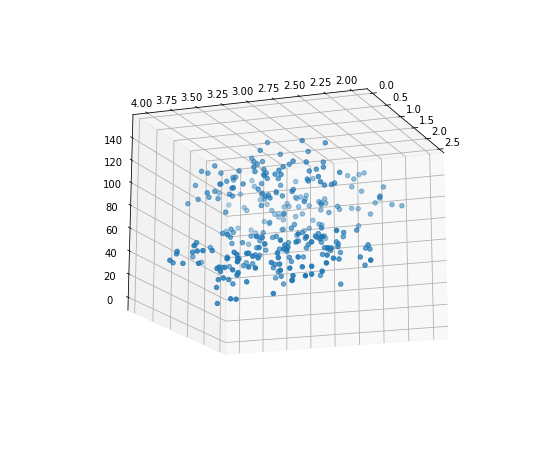

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Create the SCATTER() plot 
ax.scatter(num4[:,0], num4[:,3], num4[:,2]);

### Interaction 

Notice that some additional framing has popped up around the plot. These are the interactive pieces. Let's experiment with a few of them: 

* **Resizing the plot** - Notice the small triangle or just as two parallel lines. Click on this and drag it to create a bigger (or smaller) plot. 
* **Changing the view** - We can change how the plot is arranged. To do so, click on a piece of the grey plot and then move the plot around. 
* **Stopping the interaction** - Only one plot can interactive at a time, so you need to click the power button to stop the interactive piece. 

What happened after you clicked the power button? 

(Markdown block for you to add what a few notes about what you notice)





#### Adding color
We can also add color to our plots just as before using the `c` and `cmap` flags. Add color to our plot using the "Greens" colormap: 

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Create the SCATTER() plot with colors
ax.scatter(num4[:,0], num4[:,3], num4[:,2], ????);

#### Adding Axes using `plot()`

While you can use `plot()` to plot a line in three dimensions, in this notebook, we will use it to create axes. 

First, we will use `linspace` and `zeros` to create numpy arrays which will then become the axes: 

In [40]:
# Creating the first axis
x_min = min(np.min(num4[:,0]),-1)
x_max = np.max(num4[:,0])
x_axis = np.linspace(x_min,x_max, 1000)

# Creating the second axis
y_min = min(np.min(num4[:,3]),-1)
y_max = np.max(num4[:,3])
y_axis = np.linspace(y_min,y_max, 1000)

# Creating the third axis
z_min = min(np.min(num4[:,2]),-1)
z_max = np.max(num4[:,2])
z_axis = np.linspace(z_min,z_max, 1000)

# Create a vector of zeros to be the same length as the axes
axis_0 = np.zeros(1000)


In [42]:
# Check out what you have created in this code block

#### Using `plot()` for 3D
Using the numpy arrays, first create plot layers with the axes and then add your points on top. 

Notice that just as with `scatter`, to create a 3D line with `plot`, we can three data arguments once we have set the projection view. 

Once you have created your plot, re-orient the plot so that the data faces towards you with the axes are behind and below the data. 

In [45]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Create each axis individually and 
#    use the color flag make sure each one is black
ax.plot(x_axis, axis_0, axis_0, c="k")
ax.plot(axis_0, y_axis, axis_0, c=???)
ax.plot(axis_0, axis_0, z_axis, c=???)

# Create the SCATTER() plot with colors
ax.scatter(num4[:,0], num4[:,3], num4[:,2]);

SyntaxError: invalid syntax (<ipython-input-45-1738e942ef9e>, line 7)

### Dimension reduction for Visualizations

Even with the best 3D plotting skills, it can be more than a challenge to view three-dimensional data on a screen (that is a two-dimensional object). Which leads us to a question: **What is the best flat (or 2D) representation of data?**

There are a few ways to answer this question. The first option is to create all possible 2D visualizations made of all combinations of two variables. The second option is to create all possible 3D visualizations and simply swirl the visualizations until you find an acceptable 2D view. Both of these options are exhausting. 

Visualization is not the only reason to lower the dimension. There is another technical reason, as we discuss below. 


### The "Curse of Dimensionality" 

With very high dimensional data, we start to 

## Dimension Reduction via PCA

There are many ways to reduce the dimension. As absurd as the option of finding acceptable 2D view of a 3D plot sounds, this is the goal of _Principal Component Analysis_ but done in a more routine manner. 

### A First Example

Before we begin with details of PCA, let's consider an example on `justtwo` made of the `gym` and `coffee` variables. 

In [48]:
justtwo = students[['gym','coffee']].to_numpy()

<IPython.core.display.Javascript object>


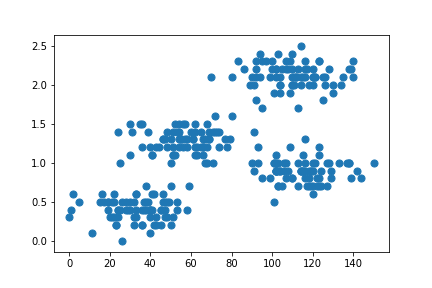

In [50]:
plt.scatter(justtwo[:,0],justtwo[:,1], s=50)

Create the plot with from [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html) for 1D

## Details of PCA

This discussion is a less precise and technical one than either of these: [1](https://plot.ly/ipython-notebooks/principal-component-analysis/) and [2](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html). The goal of this section is to provide a general understanding of how and why it works. 

### Standardizing the Data


### Covariance 
(or variables doing nearly the same thing...)

### Repositioning the vectors

### Choosing the right number of variables


### Stepping back to "original" view

#### References consulted
0. _Doing Data Science: Straight talk from the frontline_ by C. O'Neil & R. Schutt (2014)
1. [Three-Dimensional Plotting in Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)
2. [mplt3d tutorial](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)
3. [Using matplotlib in jupyter notebooks — comparing methods and some tips](https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1)
4. [linspace helpfile](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)
5. [Principal Component Analysis in Python](https://plot.ly/ipython-notebooks/principal-component-analysis/)
6. [In Depth: Principal Component Analysis](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)